In [1]:
import os
from utils.configuration import *
from sklearn.model_selection import train_test_split

In [2]:
experiment_name = "api_ordinal_simple_4"      ## <--- set experiment name
LOG_DIR="/home/bule/TramDag/dev_experiment_logs"  ## <--- set log directory
EXPERIMENT_DIR = os.path.join(LOG_DIR, experiment_name)
CONF_DICT_PATH = os.path.join(EXPERIMENT_DIR, f"configuration.json")

In [3]:
setup_configuration(experiment_name,EXPERIMENT_DIR)

Configuration already exists/home/bule/TramDag/dev_experiment_logs/api_ordinal_simple_4/configuration.json


In [4]:
# import numpy as np
# import pandas as pd
# from sklearn.datasets import make_classification

# # Generate synthetic data for logistic regression
# X, y = make_classification(
#     n_samples=100_000,      # number of samples
#     n_features=1,       # one predictor
#     n_informative=1,    # the predictor is informative
#     n_redundant=0,      # no redundant features
#     n_clusters_per_class=3,
#     class_sep=1.5,      # separation between classes
#     weights=[0.9, 0.1],  # 90% class 0, 10% class 1
#     random_state=42
# )

# # Convert to DataFrame for convenience
# df = pd.DataFrame({'x': X.flatten(), 'y': y})

# # Save or inspect
# print(df.head())


import numpy as np
import pandas as pd

# Generate one continuous predictor
n = 100_000
x = np.random.normal(0, 1, n)

# Define thresholds for 4 ordered levels
thresholds = [-0.8, 0.0, 0.8]

# Digitize x into 4 ordinal levels (0,1,2,3)
y = np.digitize(x, thresholds)

# Combine into DataFrame
df = pd.DataFrame({'x': x, 'y': y})

print(df.head())
print(df['y'].value_counts(normalize=True))


          x  y
0  2.458049  3
1 -0.270491  1
2 -0.246401  1
3 -0.959405  0
4  0.897952  3
y
2    0.28738
1    0.28626
3    0.21392
0    0.21244
Name: proportion, dtype: float64


In [5]:
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [6]:
data_type={'x':'continous','y':'ordinal_Xn_Yo'}
data_type

{'x': 'continous', 'y': 'ordinal_Xn_Yo'}

In [7]:
write_data_type_to_configuration(data_type, CONF_DICT_PATH)

---------------------------------------------------------------------------------------------------------
                                       |                       MODEL SETTINGS                       
Variable             | dtype           | As Predictor                   | As Target                     
---------------------------------------------------------------------------------------------------------
x                    | continous       | continuous [c]                 | continuous [c]                
y                    | ordinal_Xn_Yo   | ordinal [0,…,K]                | ordinal    [0,…,K]            
---------------------------------------------------------------------------------------------------------
Configuration updated successfully.


/home/bule/TramDag/utils/configuration.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


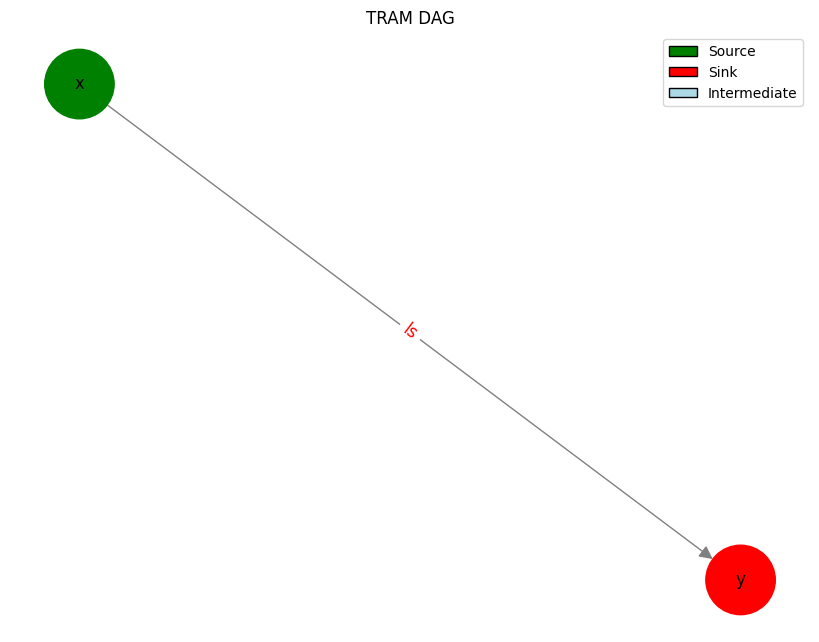

In [8]:
interactive_adj_matrix(CONF_DICT_PATH,seed=19)

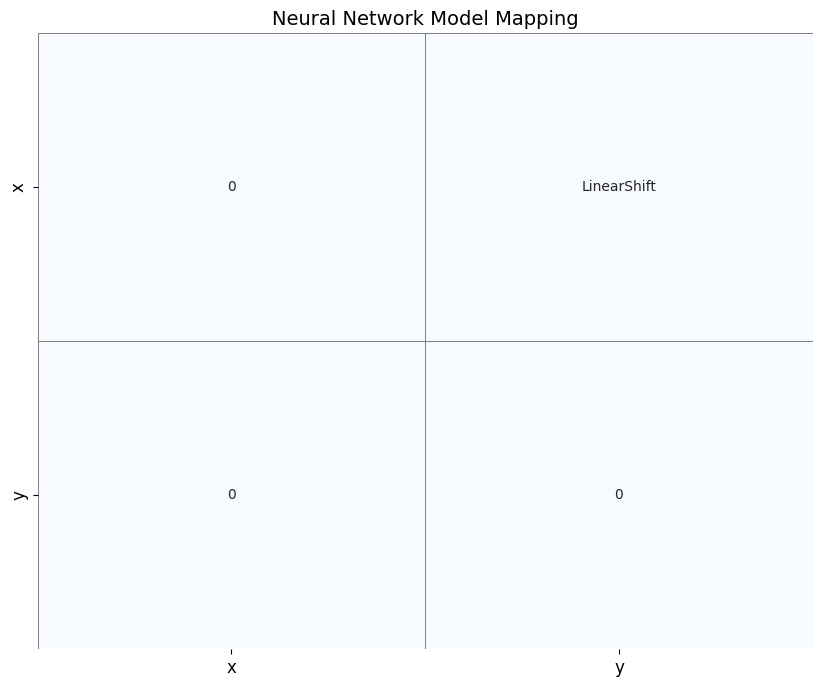

In [9]:
interactive_nn_names_matrix(CONF_DICT_PATH, seed=5)

In [10]:
from utils.tramdag import TramDagConfig , TramDagModel

cfg = TramDagConfig.load(f"/home/bule/TramDag/dev_experiment_logs/{experiment_name}/configuration.json")
cfg.compute_levels(train_df)
device='cpu'

In [11]:
td_model = TramDagModel.from_config(cfg, set_initial_weights=False,verbose=True,debug=True,device=device,initial_data = train_df) 
# 1m52s

[DEBUG] TramDagModel using device: cpu

[INFO] Building model for node 'x' with settings: {'set_initial_weights': False, 'debug': True, 'verbose': True, 'device': 'cpu', 'initial_data':               x  y
75220 -0.139644  1
48955  1.495045  3
44966  0.894052  3
13568 -0.479595  1
92727  1.673663  3
...         ... ..
6265  -2.391658  0
54886 -0.675628  1
76820  0.207815  2
860    0.006744  2
15795  0.306278  2

[80000 rows x 2 columns]}
[DEBUG] get_fully_specified_tram_model(): device: cpu
[DEBUG] default_number_thetas for continuous outcomes: 20

[INFO] Building model for node 'y' with settings: {'set_initial_weights': False, 'debug': True, 'verbose': True, 'device': 'cpu', 'initial_data':               x  y
75220 -0.139644  1
48955  1.495045  3
44966  0.894052  3
13568 -0.479595  1
92727  1.673663  3
...         ... ..
6265  -2.391658  0
54886 -0.675628  1
76820  0.207815  2
860    0.006744  2
15795  0.306278  2

[80000 rows x 2 columns]}
[DEBUG] get_fully_specified_tram_model(): dev

In [17]:
td_model.fit(train_df, val_df,
            #  train_list=['target'],
             learning_rate=1e-2,
             epochs=500,batch_size=1_000,
             verbose=True,debug=False,
             device=device,
             save_linear_shifts=True,
             save_simple_intercepts=True,
             num_workers = 8,
             persistent_workers = True,
             prefetch_factor = 8,
             train_mode = "sequential")#,

#30 eps 1m 49s seq mode from start 1000 bs
#30 eps 2m 27s parllel multiprocessing mode from start 1000 bs
# 200 eps 9m 30s seq mode from start 1000 bs

[INFO] Computing new minmax dict from training data...
[INFO] Saved new minmax dict to /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple_4/min_max_scaling.json
[INFO] Training 2 nodes (sequential) on cpu

[INFO] Training node 'x' for 500 epochs on cpu (pid=997516)
[INFO] Existing model found. Loading weights and history...

===== Epoch 301/500 =====
[INFO] Saved simple intercept weights for epoch 301 -> /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple_4/x/simple_intercepts_all_epochs.json
[INFO] Epoch 301: Train NLL=1.3799 | Val NLL=1.3858 | Time=1.08s

===== Epoch 302/500 =====
[INFO] Saved simple intercept weights for epoch 302 -> /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple_4/x/simple_intercepts_all_epochs.json
[INFO] Epoch 302: Train NLL=1.3799 | Val NLL=1.3858 | Time=0.80s

===== Epoch 303/500 =====
[INFO] Saved simple intercept weights for epoch 303 -> /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple_4/x/simple_intercepts_all_epochs.json
[IN

[INFO] Loaded training/validation histories for 2 nodes.


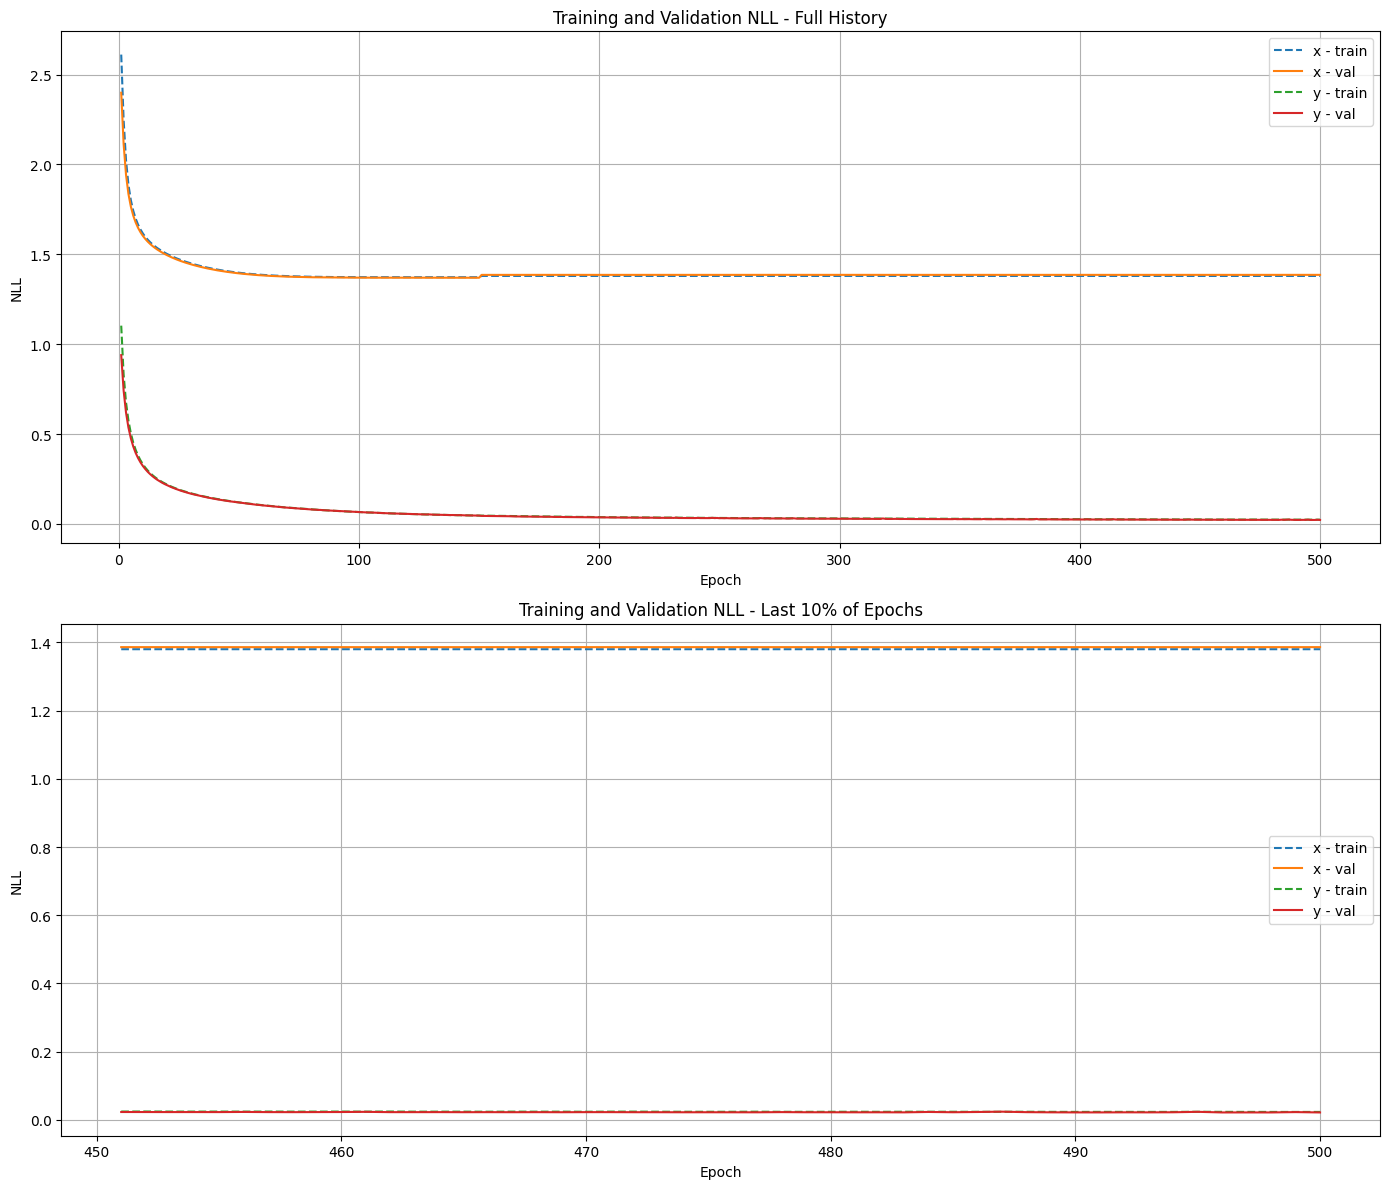

In [18]:
td_model.plot_loss_history()

[WARNING] No linear shift history found for node 'x' at /home/bule/TramDag/dev_experiment_logs/api_ordinal_simple_4/x/linear_shifts_all_epochs.json


/home/bule/TramDag/utils/tramdag.py:1569: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(


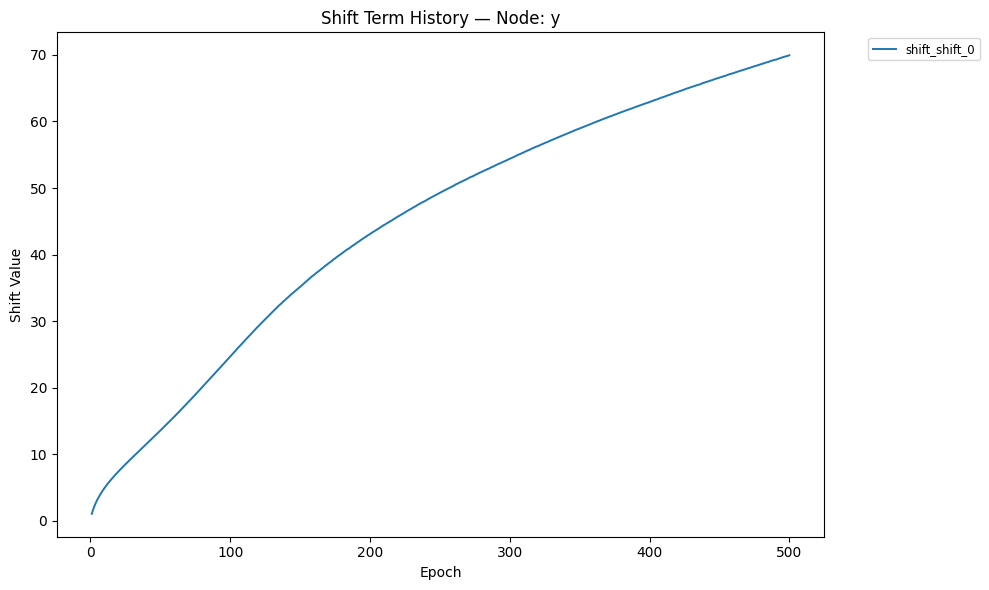

In [19]:
td_model.plot_shift_histories()

/home/bule/TramDag/utils/tramdag.py:1618: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(extract_scalar)


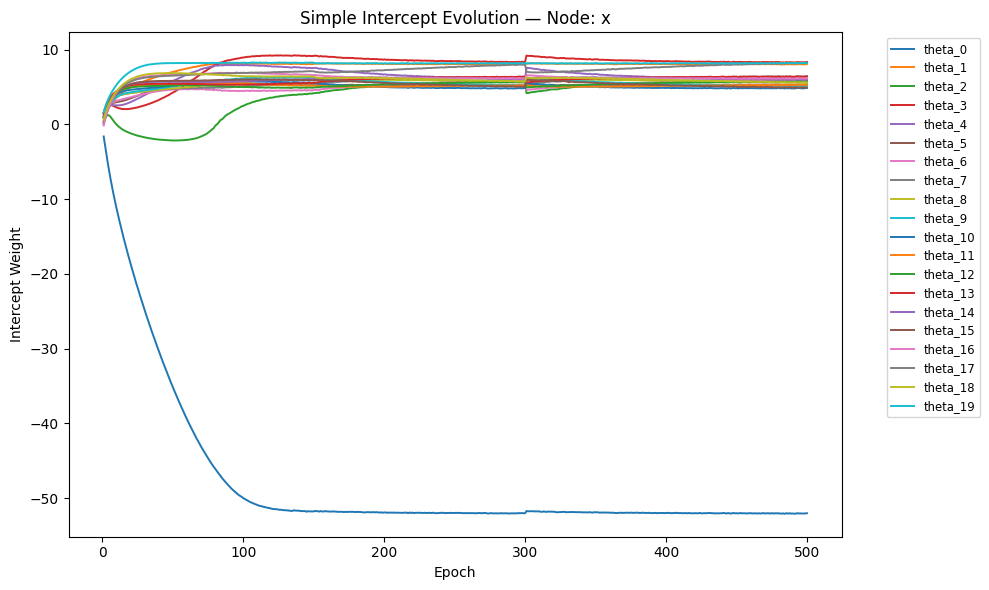

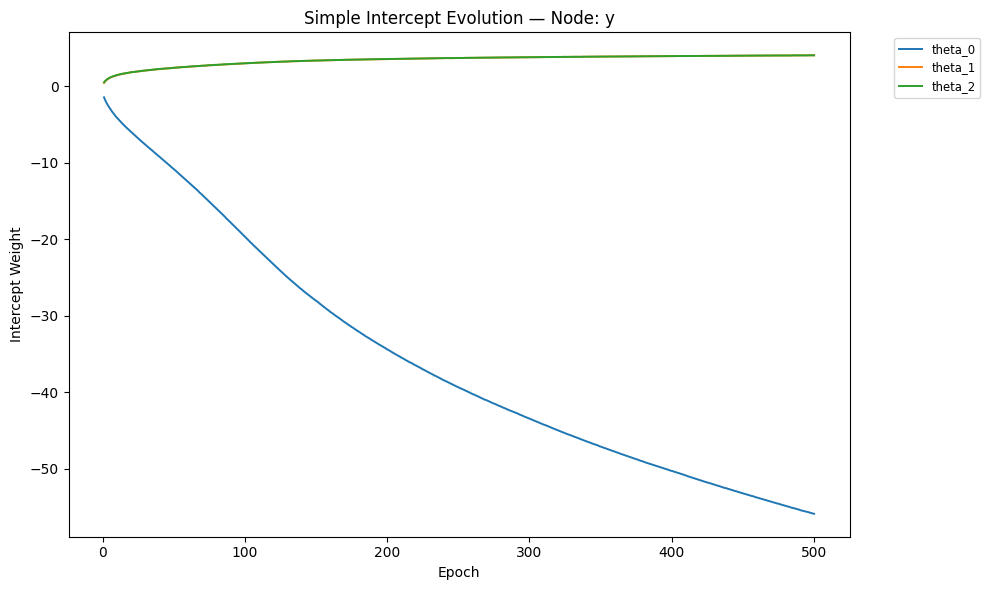

In [20]:
td_model.plot_simple_intercepts()

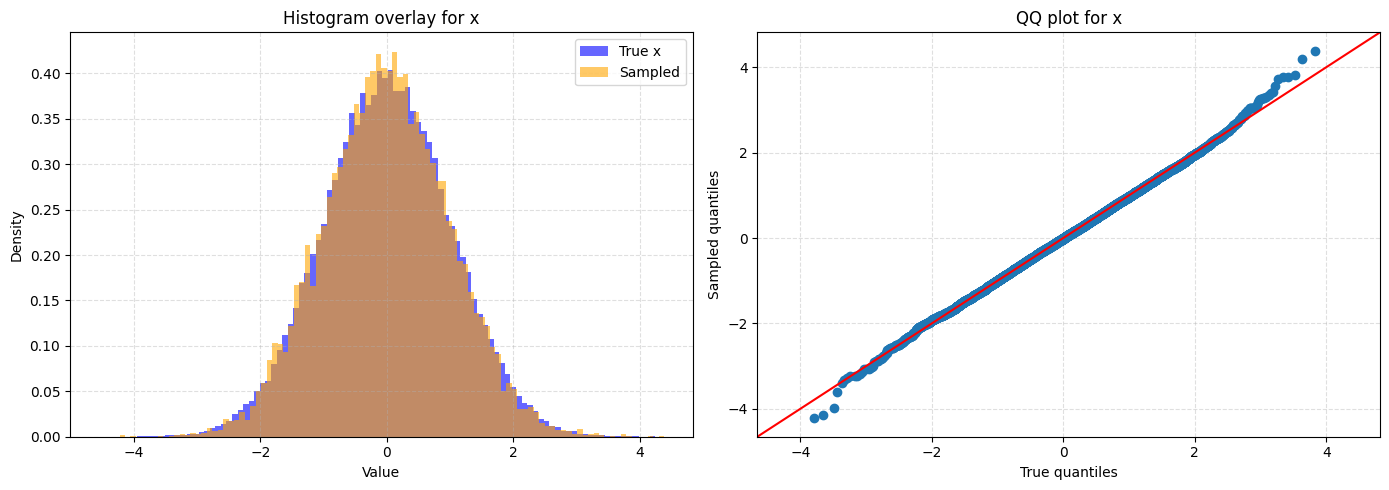

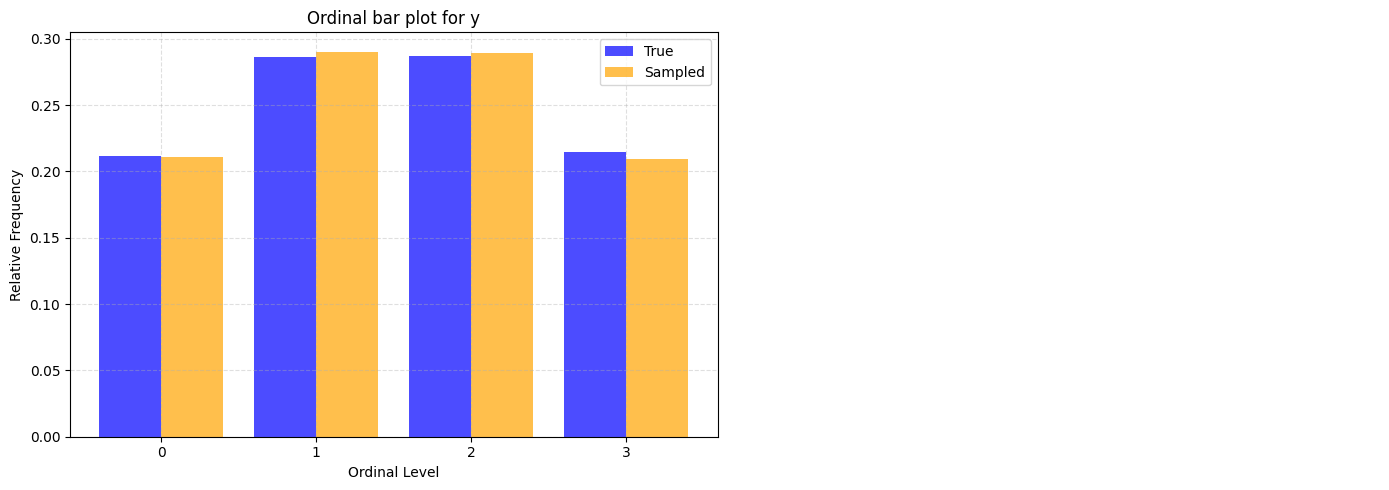

In [21]:
td_model.show_samples_vs_true(train_df)